In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from glob import glob


#import warnings
#warnings.filterwarnings('ignore')


In [2]:
def limit_rc(CE_in,rc):
    index_use = CE_in[:,3] * (1-CE_in[:,4]) <rc
    return CE_in[index_use,:]

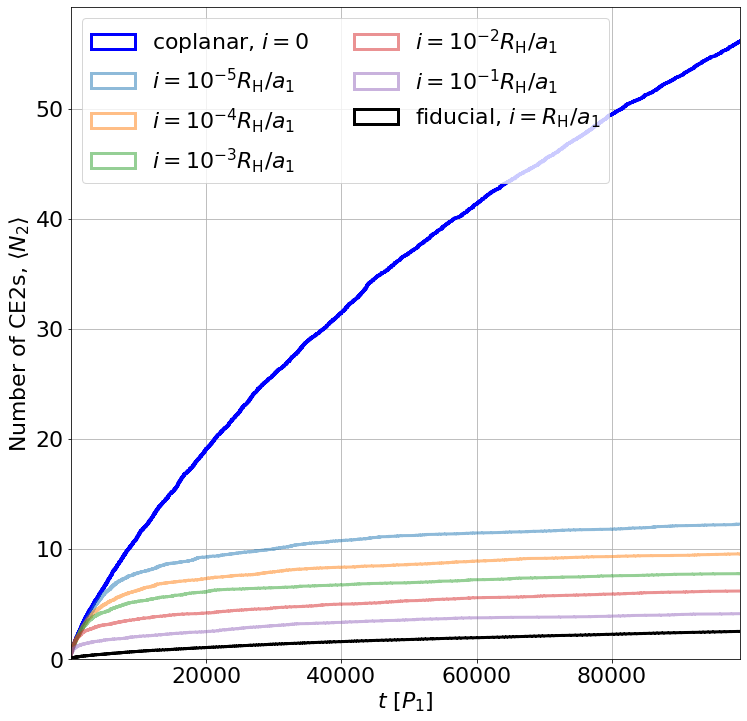

In [3]:
## 
##  Read the data for canonical runs
##

RH = (2e-5/3.)**(1./3.)
rc = 0.01*RH


can_CE0 = limit_rc( np.load('../data/can_CE0-2000.npy'), rc)
can1_CE0 = limit_rc( np.load('../data/can-1_CE0.npy'), rc)
can2_CE0 = limit_rc( np.load('../data/can-2_CE0.npy'), rc)
can3_CE0 = limit_rc( np.load('../data/can-3_CE0.npy'), rc)
can4_CE0 = limit_rc( np.load('../data/can-4_CE0.npy'), rc)
can5_CE0 = limit_rc( np.load('../data/can-5_CE0.npy'), rc)
canf_CE0 = limit_rc( np.load('../data/can-flat_CE0.npy'), rc)



##
##  Plot the time evolution of number
##
plt.rcParams.update({'font.size':22})

fig,axs = plt.subplots(1,1, sharex=True, figsize=(12,12))
fig.subplots_adjust(hspace=0.0)

axs.set_xlabel(r'$t$ [$P_1$]')
axs.set_ylabel(r'Number of CE2s, $\left<N_2\right>$')
axs.set_xlim([1e0,0.99e5])

# parameters of the plot

nbins = 4001
t_bins = np.linspace(1e1,1e5,nbins)
nw = 1./200.
lw = 3
aluse = 0.5


# CE0

Nt_cp, bin_out, bar_out = axs.hist(canf_CE0[:,0], bins=t_bins,linewidth=lw,
            weights=canf_CE0[:,0]*0+nw,density=False,cumulative=True,histtype='step',
            label=r'coplanar, $i=0$',color='b')

axs.hist(can5_CE0[:,0], bins=t_bins,linewidth=lw,
            weights=can5_CE0[:,0]*0+nw,density=False,cumulative=True,histtype='step',
            label=r'$i=10^{-5}R_{\rm H}/a_1$',alpha=aluse)

axs.hist(can4_CE0[:,0], bins=t_bins,linewidth=lw,
            weights=can4_CE0[:,0]*0+nw,density=False,cumulative=True,histtype='step',
            label=r'$i=10^{-4}R_{\rm H}/a_1$',alpha=aluse)

axs.hist(can3_CE0[:,0], bins=t_bins,linewidth=lw,
            weights=can3_CE0[:,0]*0+nw,density=False,cumulative=True,histtype='step',
            label=r'$i=10^{-3}R_{\rm H}/a_1$',alpha=aluse)

axs.hist(can2_CE0[:,0], bins=t_bins,linewidth=lw,
            weights=can2_CE0[:,0]*0+nw,density=False,cumulative=True,histtype='step',
            label=r'$i=10^{-2}R_{\rm H}/a_1$',alpha=aluse)

axs.hist(can1_CE0[:,0], bins=t_bins,linewidth=lw,
            weights=can1_CE0[:,0]*0+nw,density=False,cumulative=True,histtype='step',
            label=r'$i=10^{-1}R_{\rm H}/a_1$',alpha=aluse)

nw = 1./2000.

axs.hist(can_CE0[:,0], bins=t_bins,linewidth=lw,
            weights=can_CE0[:,0]*0+nw,density=False,cumulative=True,histtype='step',
            label=r'fiducial, $i=R_{\rm H}/a_1$',color='k')


axs.legend(loc=2,ncol=2)
axs.grid()
axs.set_axisbelow(True)


##
##  Set the labels
##

#axs.text(0.1, 0.75,'CE0', ha='center', va='center', transform=axs.transAxes)


##  Save the figure

plt.savefig('./pics/pics-NCE-vs-t-inc.pdf',bbox_inches='tight',transparent=True)
plt.savefig('./pics/pics-NCE-vs-t-inc.png',bbox_inches='tight',transparent=True)


In [7]:
rcap = 1.e-4*RH
print(len(limit_rc(canf_CE0,rcap)[:,0])/200.)
print(len(limit_rc(can5_CE0,rcap)[:,0])/200.)
print(len(limit_rc(can4_CE0,rcap)[:,0])/200.)
print(len(limit_rc(can3_CE0,rcap)[:,0])/200.)
print(len(limit_rc(can2_CE0,rcap)[:,0])/200.)
print(len(limit_rc(can1_CE0,rcap)[:,0])/200.)
print(len(limit_rc(can_CE0,rcap)[:,0])/2000.)


5.645
0.99
0.6
0.455
0.22
0.11
0.0275


56.45500000001071
[137.17575663   0.612199  ]


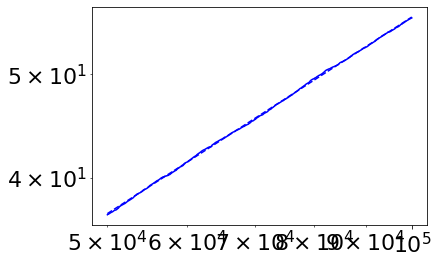

In [6]:
from scipy.optimize import curve_fit

def Nt(t, T0, beta):
    return (t/T0)**beta

t_mid = 0.5*(t_bins[1:]+t_bins[:-1])
i_use = t_mid>5e4

popt, pcov = curve_fit(Nt, t_mid[i_use], Nt_cp[i_use], p0=np.array([Nt_cp[-1]/t_mid[-1],0.55]))
print(Nt_cp[-1])
print(popt)
plt.loglog(t_mid[i_use],Nt_cp[i_use],'b')
plt.loglog(t_mid[i_use],Nt(t_mid[i_use],popt[0],popt[1]),'b--')